<a href="https://colab.research.google.com/github/sukjin1/ed/blob/main/Training_DNN_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hands on machine learning (Chap11) - 심층 신경망 훈련


###하이퍼볼릭 탄젠트 함수(tanh)

하이퍼볼릭 탄젠트 함수(tanh, hyperbolic tangent)는 시그모이드 함수의 대체제로 사용할 수 있는 활성화 함수이며 아래와 같은 식을 갖는 함수이다.
$$
\begin{align*}
\text{tanh}(x) &= \frac{1-e^{-x}}{1+e^{-x}} \\ &= \frac{2}{1+e^{-2x}} -1
\end{align*}
$$
tanh함수는 시그모이드 함수($\sigma$)와 유사하며, 아래와 같이 시그모이드 함수를 이용해 tanh 함수를 나타낼 수 있다.

$$
\text{tanh}(x) = 2 \sigma(2x)-1
$$
tanh함수는 아래의 그림과 같이 입력값의 총합을 -1에서 1사이의 값으로 변환해 주며, 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동이 일어나지 않는다. 하지만, tanh함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되므로 그래디언트를 소멸시켜 버리는 문제가 있다.

![](./images/tanh.png)

가중치 초기화 (Weight Initialization)

신경망 학습에서 중요한것 중 하나는 학습 시킬 때의 가중치 초기값이다. 가중치 초기값을 어떻게 초기화 하느냐에 따라 학습이 잘될 때가 있고 잘 안될 때가 있다.  이번에는 가중치를 초기화하는 방법에 대해 알아보도록 하자.

###가중치 초기값이 0이거나 동일한 경우

가중치의 초기값을 모두 0으로 초기화하거나 동일한 값으로 초기화할 경우 모든 뉴런의 동일한 출력값을 내보낼 것이다.  그렇게 되면 역전파(backpropaation) 단계에서 각 뉴런이 모두 동일한 그래디언트 값을 가지게 된다. 학습이 잘 되려면, 각 뉴런이 가중치에 따라 비대칭(asymmetry, 어떤 뉴런은 가중치가 크고 어떤 뉴런은 가중치가 작게 되게끔)이어야 하는데, 모든 뉴런이 동일한 그래디언트로 가중치 값이 변경되므로 뉴런의 개수가 아무리 많아도 뉴런이 하나뿐인 것처럼 작동하기 때문에 학습이 제대로 이루어지지 않는다.  따라서 가중치 초기값을 동일한 값으로 초기화 해서는 안된다.

### 작은 난수 (Small Random numbers) 인 경우

가중치 초기값은 작은 값으로 초기화 해야하는 데, 그 이유는 활성화 함수가 sigmoid일 경우 만약 가중치 초기값(절대값)을 큰 값으로 한다면 0과 1로 수렴하기 때문에 그래디언트 소실이 발생하게 된다. 또한 활성화 함수가 ReLU일 경우 절대값이 클 경우 음수일 때는 dead ReLU 문제가 발생하고, 양수일 때는 그래디언트 폭주가 일어나게 된다.

따라서, 가중치 초기값을 작게 초기화 해야하며 동일한 초기값을 가지지 않도록 랜덤하게 초기화 해야한다. 일반적으로 가중치 초기값은 평균이 0이고 표준편차가 0.01인 정규분포(가우시안 분포)를 따르는 값으로 랜덤하게 초기화 한다.

이러한 가중치 초기화 방법은 얕은 신경망에서는 괜찮게 작동할지 모르지만 신경망의 깊이가 깊어질수록 문제가 발생하게 된다. 예를들어, 평균이 0이고 표준편차가 0.01인 정규분포(가우시안 분포)를 따르는 값으로 랜덤하게 초기화하고 tanh를 활성화 함수로 사용하였을 경우, 아래의 그림처럼 첫번째 hidden layer를 제외한 나머지 레이어들이 모두 0을 출력하고 있는것을 확인할 수 있다. 따라서, 11.4.1에서 살펴보았듯이 모든 뉴런의 그래디언트 값이 동일하기 때문에 학습이 이루어지지 않게 된다.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    '''가중치 초기화 함수

    Args:
        - method: 가중치 초기화 방법(large, small, xavier, relu)
    Returns:
        - np.array형태의 가중치 초기값
    '''
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

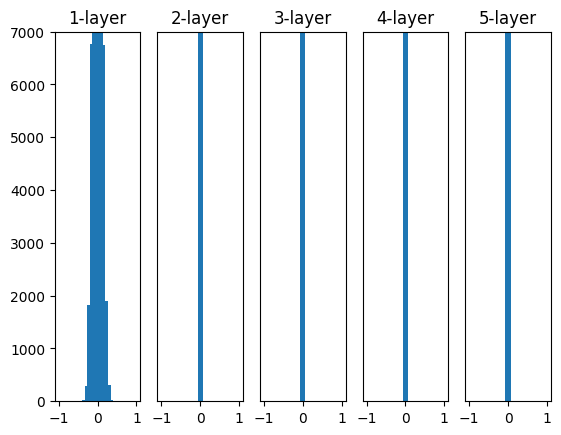

In [7]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

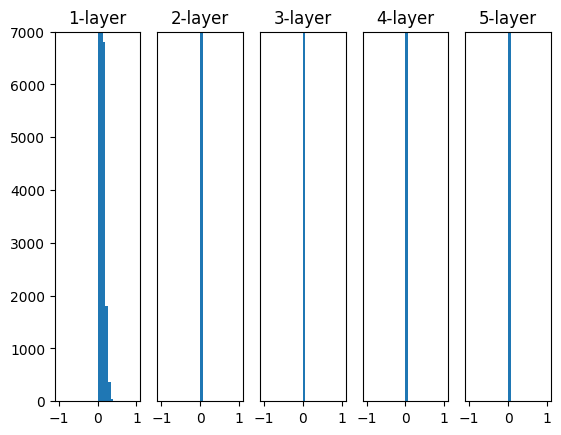

In [10]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

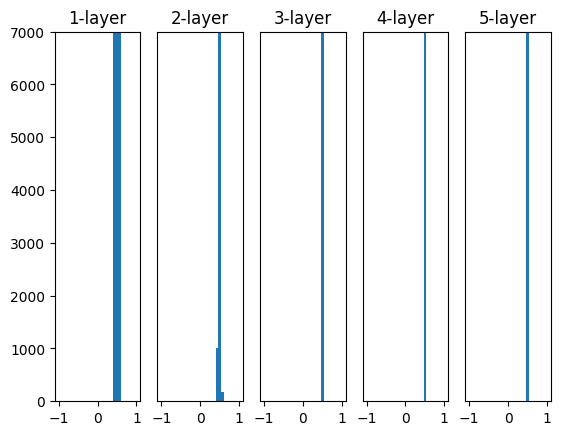

In [15]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

또한, 평균이 0이고 표준편차가 1인 정규분포를 따르는 값으로 랜덤하게 초기화하고 tanh를 활성화 함수로 사용하였을 경우에는 아래의 그림처럼 tanh의 출력이 -1과 1로 집중되면서 그래디언트 소실(vanishing gradient) 문제가 발생하게 된다.

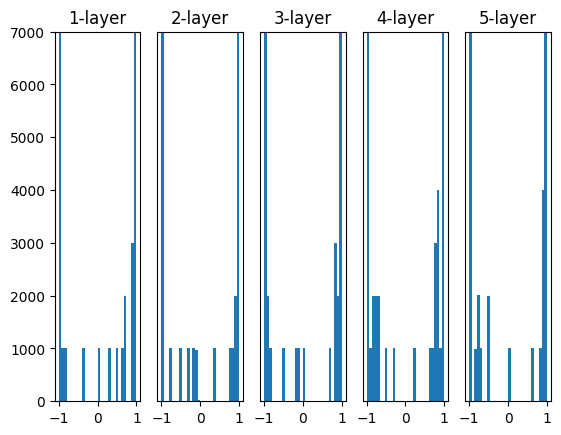

In [17]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

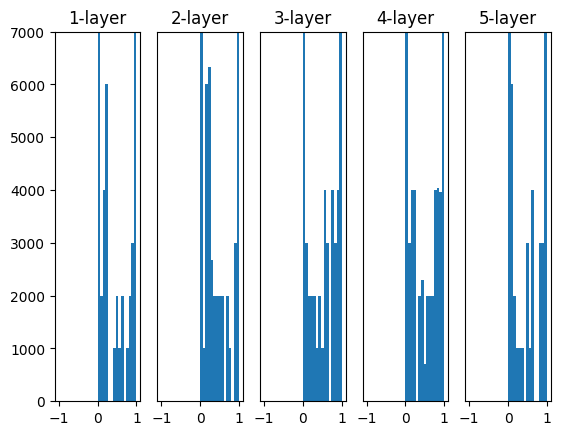

In [18]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

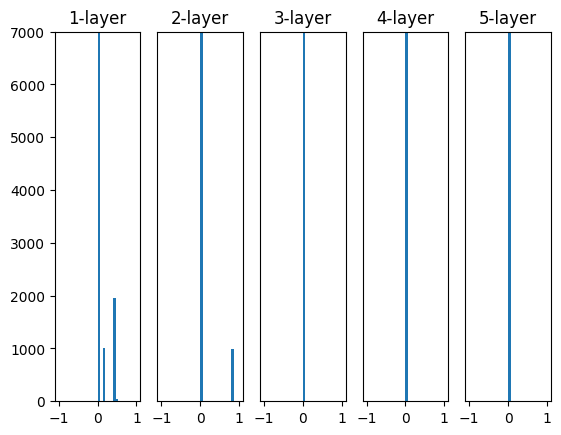

In [19]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

따라서, 작은 난수로 가중치를 초기화 하는 방법 또한 심층 신경망(DNN)에서는 적합하지 않다고 할 수 있다.

### 11.4.3 Xavier 초기화와 He 초기화

학습이 제대로 이루어지기 위해서는 각 뉴런의 활성화 함수 출력값이 고르게 분포되어 있어야 한다. 레이어와 레이어 사이에 다양한 데이터가 흘러야(forward, backprop) 신경망 학습이 효율적으로 이루어진다. 만약, 4.2에서와 같이 한쪽으로 치우친 데이터가 흐르게 되면 그래디언트 소실이나 모든 뉴런의 그래디언트 값이 동일해져 학습이 이루어지지 않는 문제가 발생한다.

#### 11.4.3.1 Xavier Initialization

[Xavier Glorot과 Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)는 적절한 데이터가 흐르기 위해서는 각 레이어의 출력에 대한 분산이 입력에 대한 분산과 같아야 하며, 역전파에서 레이어를 통과하기 전과 후의 그래디언트 분산이 동일해야 한다고 주장했다.  Glorot과 Bengio는 'Understanding the Difficulty of Training Deep Feedforward Neural Networks'라는 논문에서 아래의 식과 같은 가중치 초기값을 제안했는 데, 이러한 초기화 방법을 **Xavier Initialization** 라고 한다.

Xavier 초기값은 **활성화 함수가 선형(linear)이라고 가정**한다. 아래의 그림에서 처럼 sigmoid 계열(sigmoid, tanh)의 활성화 함수는 좌우 대칭이며 가운데 부분이 선형인 함수로 볼 수 있다.

![](./images/sigmoid-linear.png)



이러한 가정을 토대로 sigmoid 활성화 함수에서의 Xavier initialization 식은 다음과 같다.

- 평균이 0이고 표준편차 $\sigma = \sqrt{\frac{2}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 인 정규분포
- 또는 $r = \sqrt{\frac{6}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 일 때 $-r$과 $+r$ 사이의 균등분포
- 입력의 연결 개수와 출력의 연결 개수가 비슷할 경우 $\sigma = 1/\sqrt{n_{\text{inputs}}}$ 또는 $r = \sqrt{3} / \sqrt{n_{\text{inputs}}}$ 를 사용

아래의 그림처럼 tanh 활성화 함수에 xavier 초기값을 설정했을 때, 4.2에서 작은 난수 초기화 했을 때보다 넓게 분포되어 있는것을 확인할 수 있다.

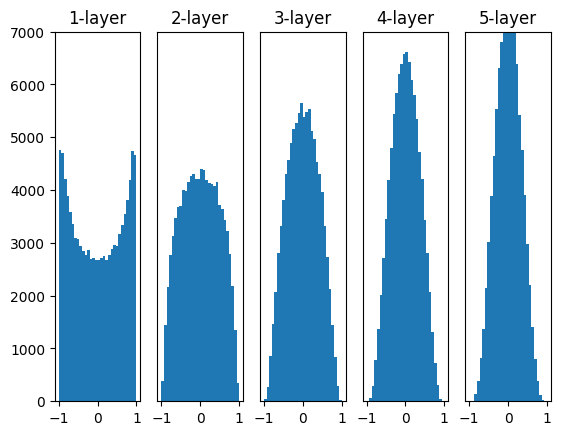

In [8]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

텐서플로에서는 이러한 Xavier 초기값을 쉽게 사용할 수 있도록 [`tf.contrib.xavier_initializer`](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer)를 제공한다.

#### 11.4.3.2 He Initialization

하지만, Xavier 초기값은 ReLU 활성화 함수에서는 아래의 그림처럼 레이어가 깊어질 수록 출력값이 0으로 치우치는 문제가 발생한다.

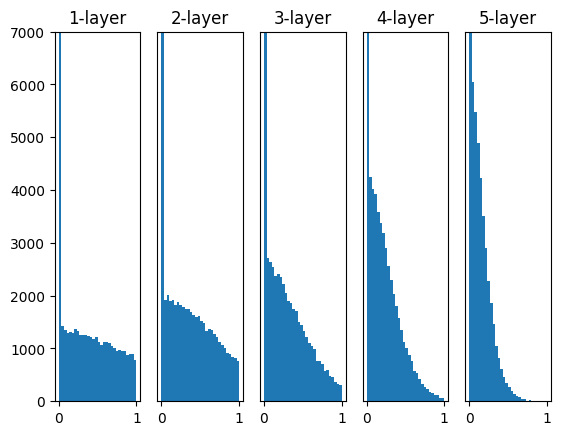

In [9]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Kaiming He는 'Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classifcation' 논문에서 ReLU에 적합한 초기값을 제안했는 데, 이를 그의 이름을 따 **He 초기값**이라고 하며 다음과 같은 식이다.

- 평균이 0이고 표준편차 $\sigma = \sqrt{2} \cdot \sqrt{\frac{2}{n_{\text{inputs}} + n_{\text{outputs}}}}$인 정규분포
- 또는 $r = \sqrt{2} \cdot \sqrt{\frac{6}{n_{\text{inputs}} + n_{\text{outputs}}}}$ 일 때 $-r$과 $+r$ 사이의 균등분포
- 입력의 연결 개수와 출력의 연결 개수가 비슷할 경우 $\sigma = \sqrt{2}/\sqrt{n_{\text{inputs}}}$ 또는 $r = \sqrt{2} \cdot \sqrt{3} / \sqrt{n_{\text{inputs}}}$ 를 사용

위의 식에서 알 수있듯이, He 초기값은 Xavier 초기값에서 $\sqrt{2}$ 배 해줬다는 것을 확인할 수 있다. 그 이유는 ReLU는 입력이 음수일 때 출력이 전부 0이기 때문에 더 넓게 분포시키기 위해서이다.

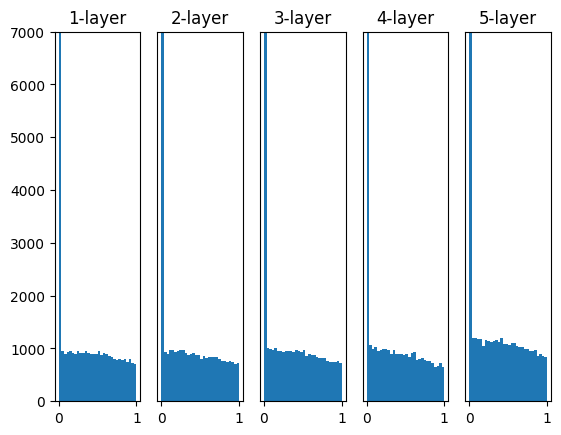

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('he')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

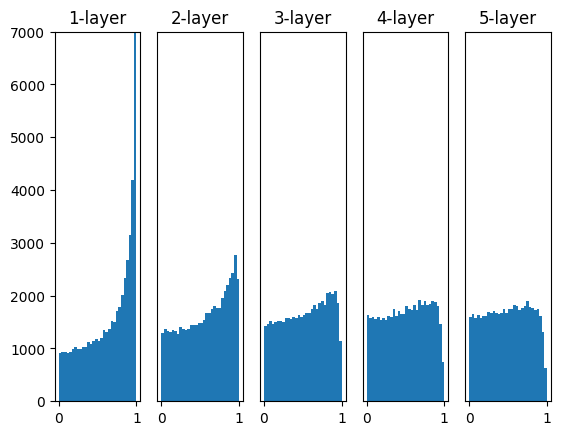

In [20]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('he')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

He 초기값 또한 텐서플로에서 쉽게 사용할 수 있도록 [`tf.keras.initializers.he_normal`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/he_normal) 과 [`tf.keras.initializers.he_uniform`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/he_uniform)을 제공한다.

## 5. 마무리

이번 포스팅에서는 심층 신경망을 학습시키기 위해 적절한 활성화 함수와 가중치 초기화 방법에 대해 알아보았다.  이번 포스팅의 내용을 아주 간략하게 요약하면 다음과 같다.

- 활성화 함수로는 ReLU를 먼저 사용하는 것이 좋다.
- 가중치 초기화는 Sigmoid일 경우 Xavier, ReLU일 경우 He 초기값을 사용하는 것이 좋다.